<a href="https://colab.research.google.com/github/jdexbarr/Neural-networks/blob/main/GAN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Real data for the dots in a circle

def sample_real_points(n_samples=1000):
    """
    Generate dots in a circle with radius 1
    """
    angles = np.random.uniform(0, 2*np.pi, n_samples)  # Generates random angles between 0 and 2π
    radius = 1.0 + 0.05 * np.random.randn(n_samples)  # Radio with Gaussian noise, a small deviation around 1.
    x = radius * np.cos(angles)
    y = radius * np.sin(angles)
    points = np.stack([x, y], axis=1)               # Combine x and y into a 2D array of points (n_samples, 2)
    return points.astype("float32")

In [ ]:
# Model
# Input: noise (z)
# Output: 2D point (x, y)

latent_dim = 2  # dimensión of the noise

def build_generator():
    model = keras.Sequential([
        layers.Input(shape=(latent_dim,)),  # Define the input layer with dimension 'latent_dim', which is the vector of the input
        layers.Dense(16, activation="relu"),  # activation functions
        layers.Dense(16, activation="relu"),
        layers.Dense(2)  # output: x, y
    ])
    return model

generator = build_generator()
generator.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 354 (1.38 KB)

 Trainable params: 354 (1.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Discriminator
# Input: 2D point
# Output: probability of being real

def build_discriminator():
    model = keras.Sequential([
        layers.Input(shape=(2,)),   # Input layer with 2 features (x, y)
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.0001),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

discriminator = build_discriminator()
discriminator.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 337 (1.32 KB)

 Trainable params: 337 (1.32 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 5. Combined Model Generator and Discriminator

# We freeze the discriminator in the combined model


discriminator.trainable = False

gan_input = keras.Input(shape=(latent_dim,))
fake_point = generator(gan_input)   # The generator takes the input vector and produces a fake image (fake_point)
gan_output = discriminator(fake_point)  #The discriminator evaluates the generated image and produces a probability that it is real or false.
gan = keras.Model(gan_input, gan_output) # The complete GAN model is built: from the noise vector to the discriminator output

gan.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss="binary_crossentropy"
)

gan.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_6 (Sequential)       │ (None, 2)              │           354 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_7 (Sequential)       │ (None, 1)              │           337 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 691 (2.70 KB)

 Trainable params: 354 (1.38 KB)

 Non-trainable params: 337 (1.32 KB)

In [ ]:
#TRAINING

epochs = 10000
batch_size = 128
print_interval = 500  # print losses every X steps

for step in range(1, epochs + 1):

    # Training the Discriminatorf

    # Real samples
    real_samples = sample_real_points(batch_size)
    real_labels = np.ones((batch_size, 1))  # label = 1 for real data

    # Fake samples  generator)
    noise = np.random.normal(size=(batch_size, latent_dim)).astype("float32")
    fake_samples = generator.predict(noise, verbose=0)
    fake_labels = np.zeros((batch_size, 1))  # label = 0 for fake data

    # Combine real + fake samples
    x_disc = np.concatenate([real_samples, fake_samples], axis=0)
    y_disc = np.concatenate([real_labels, fake_labels], axis=0)

    # Enable discriminator training
    discriminator.trainable = True
    d_loss, d_acc = discriminator.train_on_batch(x_disc, y_disc)


    # Training the Generator


    # Random noise input for the generator
    noise = np.random.normal(size=(batch_size, latent_dim)).astype("float32")

    # The generator wants the discriminator to output real
    misleading_labels = np.ones((batch_size, 1))

    # Freeze the discriminator inside GAN
    discriminator.trainable = False
    g_loss = gan.train_on_batch(noise, misleading_labels)

    # Print progress
    if step % print_interval == 0:
        print(f"Step {step}/{epochs} - d_loss: {d_loss:.4f}, d_acc: {d_acc:.2f}, g_loss: {g_loss:.4f}")

Step 500/10000 - d_loss: 0.7017, d_acc: 0.50, g_loss: 0.6900
Step 1000/10000 - d_loss: 0.6874, d_acc: 0.56, g_loss: 0.6875
Step 1500/10000 - d_loss: 0.6920, d_acc: 0.53, g_loss: 0.6928
Step 2000/10000 - d_loss: 0.6910, d_acc: 0.52, g_loss: 0.7090
Step 2500/10000 - d_loss: 0.6913, d_acc: 0.52, g_loss: 0.7079
Step 3000/10000 - d_loss: 0.6912, d_acc: 0.53, g_loss: 0.7038
Step 3500/10000 - d_loss: 0.6908, d_acc: 0.54, g_loss: 0.7037
Step 4000/10000 - d_loss: 0.6902, d_acc: 0.54, g_loss: 0.7038
Step 4500/10000 - d_loss: 0.6897, d_acc: 0.56, g_loss: 0.7028
Step 5000/10000 - d_loss: 0.6891, d_acc: 0.57, g_loss: 0.7027
Step 5500/10000 - d_loss: 0.6885, d_acc: 0.58, g_loss: 0.7024
Step 6000/10000 - d_loss: 0.6881, d_acc: 0.59, g_loss: 0.7020
Step 6500/10000 - d_loss: 0.6880, d_acc: 0.59, g_loss: 0.7016
Step 7000/10000 - d_loss: 0.6882, d_acc: 0.58, g_loss: 0.7011
Step 7500/10000 - d_loss: 0.6883, d_acc: 0.58, g_loss: 0.7006
Step 8000/10000 - d_loss: 0.6885, d_acc: 0.58, g_loss: 0.7002
Step 8500

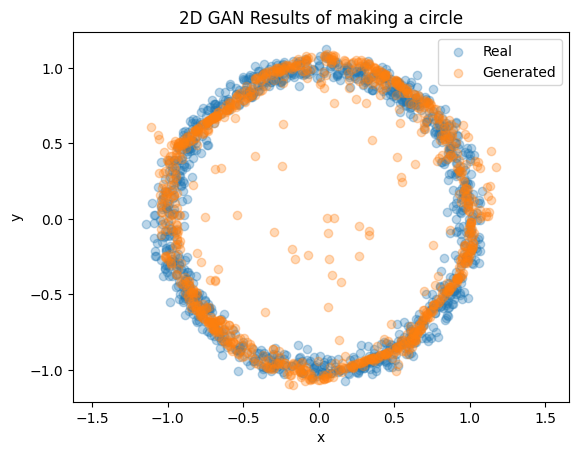

In [ ]:
# Real vs generated

# Sample real data
real_points = sample_real_points(1000)

# Generate fake data
noise = np.random.normal(size=(1000, latent_dim)).astype("float32")
generator_points = generator.predict(noise, verbose=0)

plt.scatter(real_points[:,0], real_points[:,1], alpha=0.3, label="Real")
plt.scatter(generator_points[:,0], generator_points[:,1], alpha=0.3, label="Generated")
plt.legend()
plt.title("2D GAN Results of making a circle")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.show()